In [ ]:
# Step 1: Environment Setup and Loading the Image

# Import necessary libraries
import torch
from torchvision import transforms
from PIL import Image
from google.colab import drive

# Mount Google Drive to access the image
drive.mount('/content/drive')

# Path to your image in Google Drive (adjust the path according to your Drive structure)
image_path = '/content/drive/MyDrive/AIP Assignment 2/Question 1/img3.jpeg'

# Debugging print statement to ensure the path is correct
print(f'Image path set to: {image_path}')

# Define a transform to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to a PyTorch tensor
])

# Load the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Debugging print statement to confirm the image is loaded
print(f'Image loaded successfully: {image}')

# Apply the transform to convert the image to a tensor
image_tensor = transform(image)

# Debugging print statement to show the image tensor shape
print(f'Image tensor shape: {image_tensor.shape}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image path set to: /content/drive/MyDrive/AIP Assignment 2/Question 1/img3.jpeg
Image loaded successfully: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x7E28877AD930>
Image tensor shape: torch.Size([3, 183, 275])


In [ ]:
# Flatten the image tensor to a shape of (number_of_pixels, channels)
# This converts the tensor from shape [3, 183, 275] to [3, 183*275]
pixels = image_tensor.view(3, -1).permute(1, 0)

# Debugging print statement to show the new shape of the image data
print(f'Reshaped image tensor shape: {pixels.shape}')

Reshaped image tensor shape: torch.Size([50325, 3])


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Convert the PyTorch tensor to a NumPy array for compatibility with scikit-learn
pixels_np = pixels.numpy()

# Initialize KMeans with the desired number of clusters and fit it to the data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels_np)

# Get the cluster assignments for each pixel
labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Debugging print statements
print(f'Cluster centroids: {centroids}')
print(f'Cluster labels: {labels.shape}')

# Reshape the labels back to the original image shape (ignoring the channel dimension for now)
segmented_img = centroids[labels].reshape(image_tensor.shape[1], image_tensor.shape[2], 3)

# Convert the segmented image back to a tensor for easy handling and visualization
segmented_img_tensor = torch.tensor(segmented_img, dtype=torch.float32)

# Debugging print statement
print(f'Segmented image tensor shape: {segmented_img_tensor.shape}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centroids: [[0.08930713 0.7035007  0.8336929 ]
 [0.7267409  0.8448999  0.7162688 ]
 [0.75186944 0.5189649  0.2685766 ]]
Cluster labels: (50325,)
Segmented image tensor shape: torch.Size([183, 275, 3])


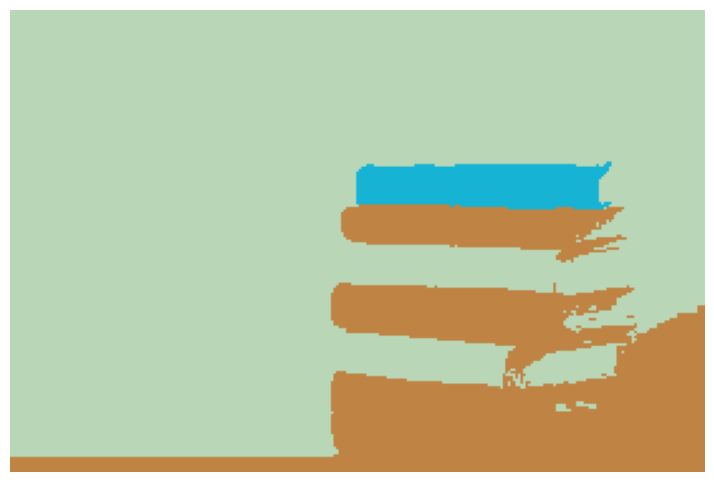

In [ ]:
import matplotlib.pyplot as plt

# Convert the segmented image tensor values back to the range [0, 255] if it was normalized
segmented_img_display = segmented_img_tensor * 255 if segmented_img_tensor.max().item() <= 1.0 else segmented_img_tensor

# Convert to integer data type and ensure it's detached from any computation graph
segmented_img_display = segmented_img_display.type(torch.uint8).detach()

# Display the segmented image
plt.figure(figsize=(10, 6))
plt.imshow(segmented_img_display)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

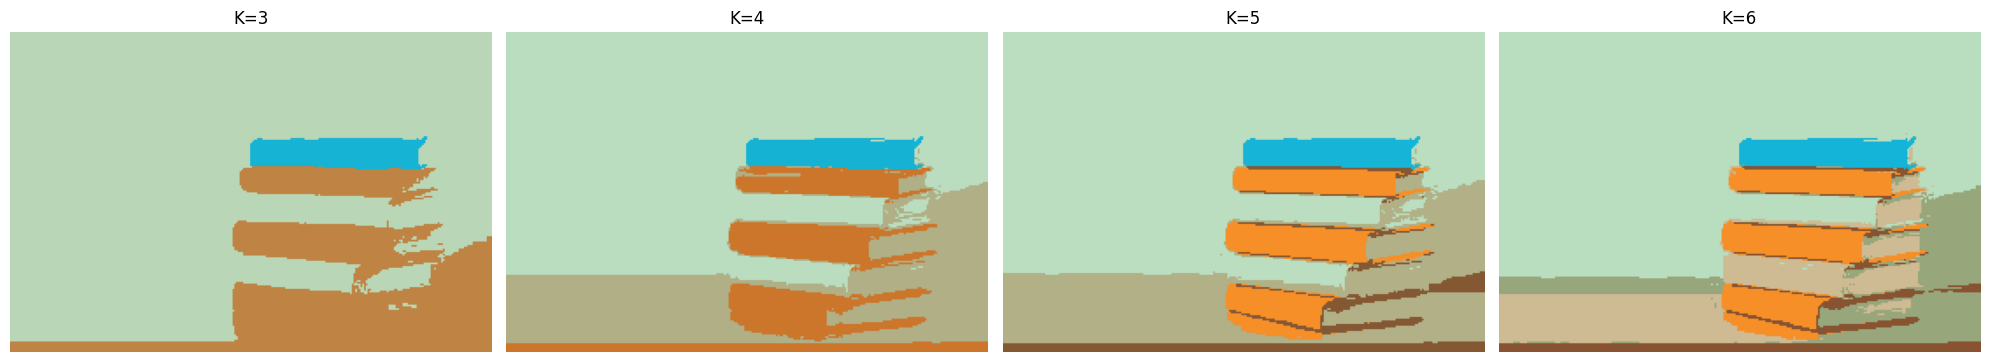

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Define a range of K values
k_values = [3, 4, 5, 6]

# Prepare a plot layout
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))

for i, k in enumerate(k_values):
    # Run K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(pixels_np)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Reconstruct the segmented image
    segmented_img = centroids[labels].reshape(image_tensor.shape[1], image_tensor.shape[2], 3)

    # Convert to tensor for easy handling
    segmented_img_tensor = torch.tensor(segmented_img, dtype=torch.float32)

    # Normalize and prepare for display if necessary
    segmented_img_display = segmented_img_tensor * 255 if segmented_img_tensor.max().item() <= 1.0 else segmented_img_tensor
    segmented_img_display = segmented_img_display.type(torch.uint8).detach()

    # Display the segmented image
    axes[i].imshow(segmented_img_display)
    axes[i].set_title(f'K={k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

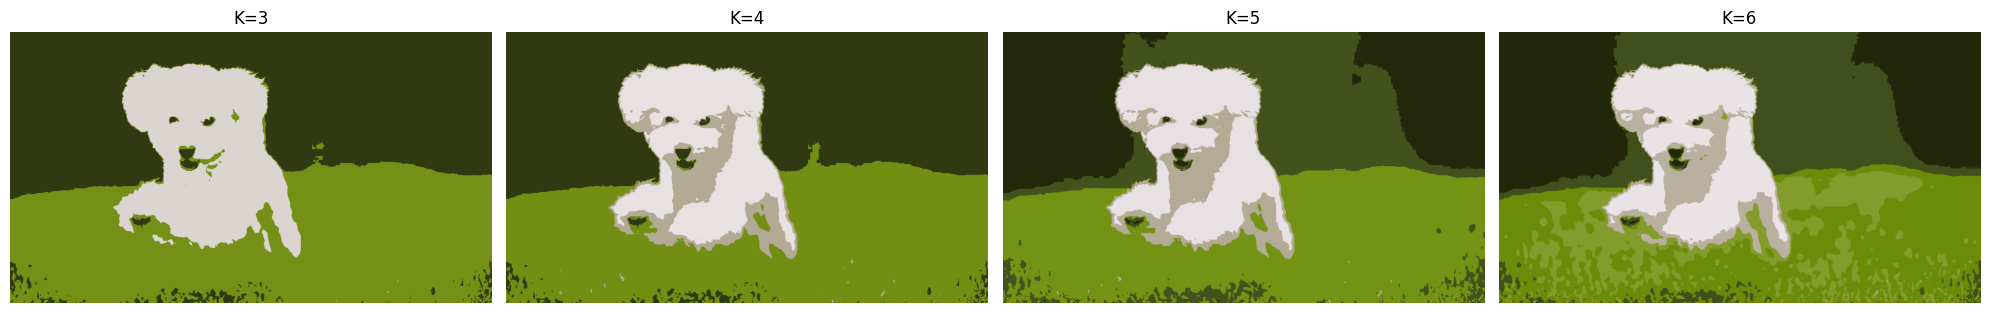

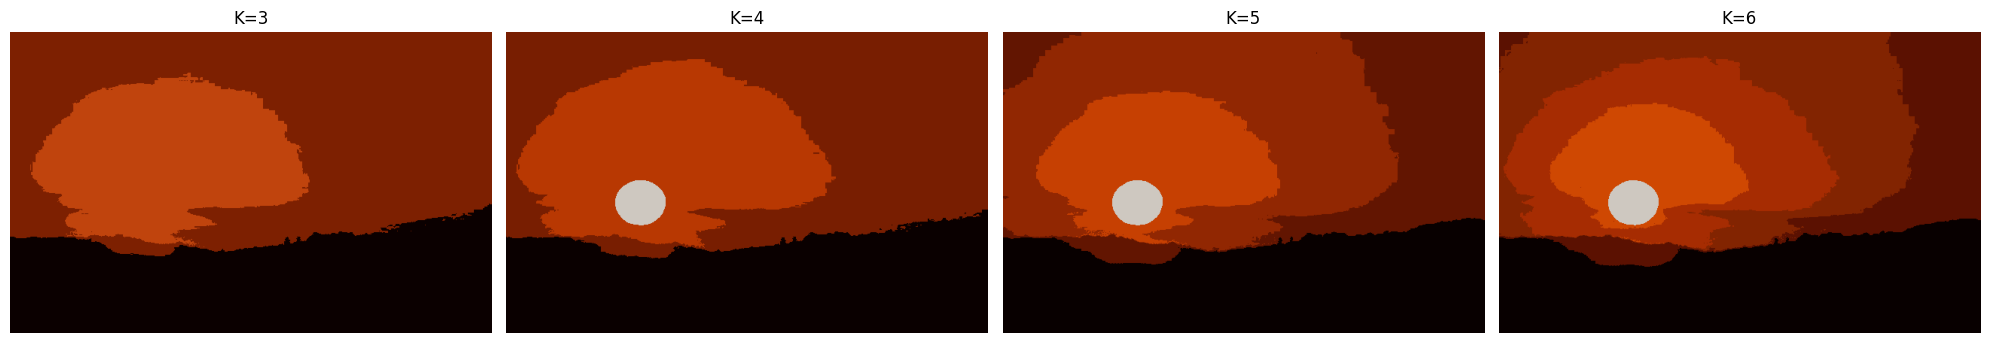

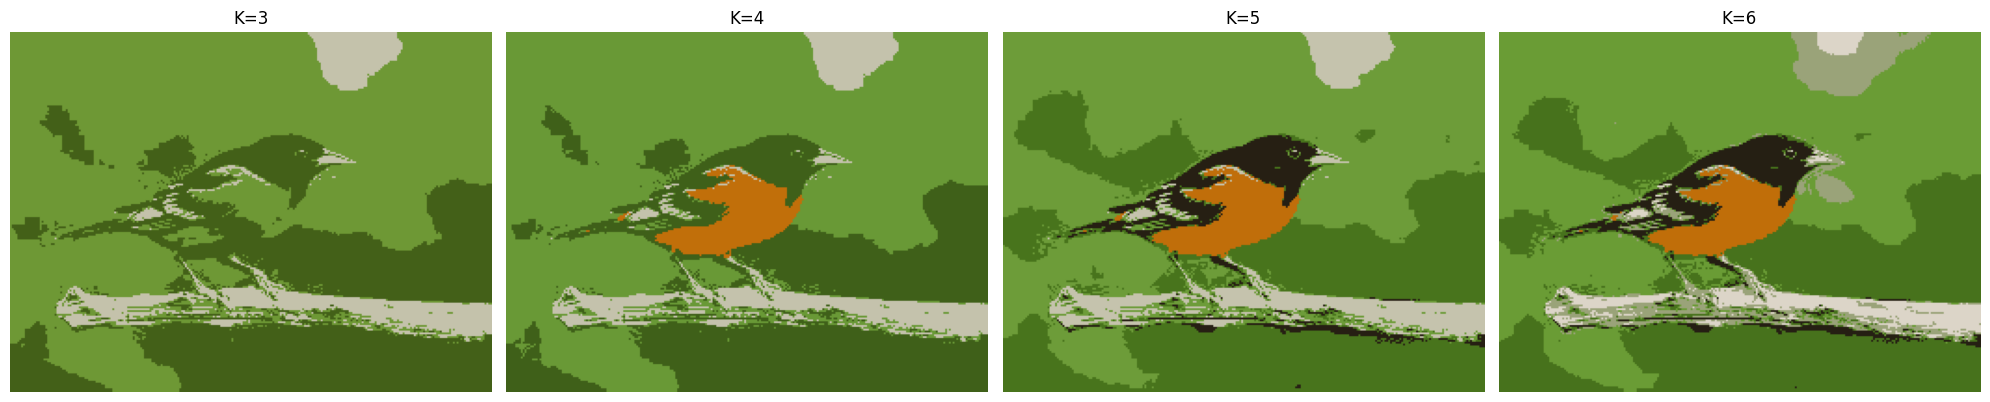

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import torch

# Function to load and preprocess an image
def load_preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    image = Image.open(image_path)
    image_tensor = transform(image)
    return image_tensor

# Function to apply K-means clustering and visualize results for an image tensor
def apply_k_means(image_tensor, k_values=[3, 4, 5, 6]):
    pixels_np = image_tensor.view(3, -1).permute(1, 0).numpy()

    fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(pixels_np)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        segmented_img = centroids[labels].reshape(image_tensor.shape[1], image_tensor.shape[2], 3)
        segmented_img_tensor = torch.tensor(segmented_img, dtype=torch.float32)

        segmented_img_display = segmented_img_tensor * 255 if segmented_img_tensor.max().item() <= 1.0 else segmented_img_tensor
        segmented_img_display = segmented_img_display.type(torch.uint8).detach()

        axes[i].imshow(segmented_img_display)
        axes[i].set_title(f'K={k}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# List of image paths in your Google Drive
image_paths = [
    '/content/drive/MyDrive/AIP Assignment 2/Question 1/img1.jpeg',
    '/content/drive/MyDrive/AIP Assignment 2/Question 1/img2.jpeg',
    '/content/drive/MyDrive/AIP Assignment 2/Question 1/img4.jpeg',
]

# Loop over each image path
for image_path in image_paths:
    # Load and preprocess the image
    image_tensor = load_preprocess_image(image_path)
    # Apply K-means clustering and visualize the results
    apply_k_means(image_tensor)